In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/msaricaumbc/DS_data/blob/master/ds602/dataset_newsletter.csv?raw=true')

In [3]:
df = df.iloc[:,1:]

In [4]:
df.head()

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [5]:
df.shape

(19607, 5)

In [6]:
df.dtypes

title             object
body              object
signature         object
submissiontime    object
category          object
dtype: object

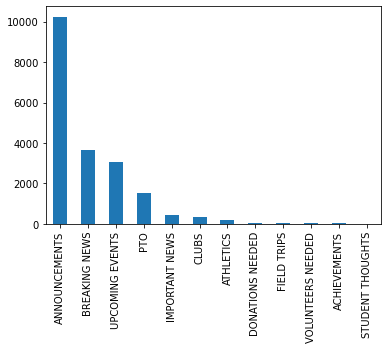

In [7]:
# from the plot we can say that the data is imbalanced 
df['category'].value_counts().plot(kind='bar')
plt.show()

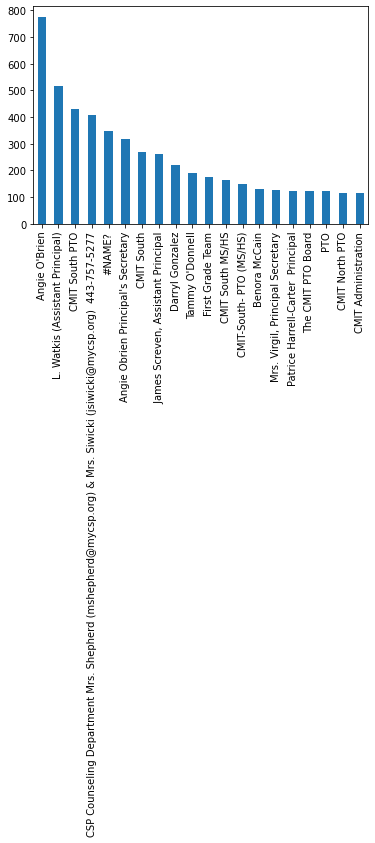

In [8]:
# top 20 signatures with most occurance in the dataset 
df['signature'].value_counts().head(20).plot(kind='bar')
plt.show()

# Data Cleaning

Checking for Nulls

In [9]:
df.isnull().sum()

title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

Dropping Nulls

In [10]:
df = df.dropna()
# dropped records with nulls as they contribute less than 2% of entire data

Type Casting all the Columns into String

In [11]:
df = df.astype(str)

Created a method to convert text to lowercase and remove special characters from the text

In [12]:
import re
def clean(x):
    x = x.lower()
    return re.sub(r'[^\w\s]','',x)

In [13]:
# cleaned body, signature and title columns
df['body'] = df['body'].apply(clean)
df['signature'] = df['signature'].apply(clean)
df['title'] = df['title'].apply(clean)

In [14]:
df['submissiontime'] = df['submissiontime'].apply(lambda x: x.split()[0])

In [15]:
df.shape

(19197, 5)

Removed records with empty string and blank space in body and signature columns

In [16]:
# after removing special characters in the data, few of the records are left with the empty strings and blank spaces
# now removed all the records with the empty strings and blank spaces 
df.drop(df[df['body'] == ''].index,inplace=True)
df.drop(df[df['body'] == ' '].index,inplace=True)
df.drop(df[df['signature'] == ''].index,inplace=True)
df.drop(df[df['signature'] == ' '].index,inplace=True)

In [17]:
df.shape

(18891, 5)

Removed Duplicates and dropped submissiontime column

In [18]:

# removing duplicates from the data with actually make the data more clear and model will able to learn the insights more accurate
new_df = df.drop(['submissiontime'],axis=1)
new_df.drop_duplicates(inplace=True)
new_df

,title,body,signature,category
0,mrs laurence class,because of the upcoming holiday we will be rev...,jaslynn laurence,ANNOUNCEMENTS
1,mr valles winter break packets cornellhamptonp...,all my cornell hampton and princeton students ...,mr sam valle,ANNOUNCEMENTS
2,hours of operation,parentsguardians we will gladly assist you ...,ms ellis,ANNOUNCEMENTS
3,character education,cmit south scholars will continue to work on v...,ched team room 163,ANNOUNCEMENTS
4,cmit students connecting with students around ...,a couple of classes have had the opportunity t...,srta dickerson,ANNOUNCEMENTS
...,...,...,...,...
19602,ms coholics science classes,hello all this week biogeochem students will ...,suzanne coholic high school science teacher s...,ANNOUNCEMENTS
19603,ap exams,clock is ticking and we have four months until...,nabil siddiqui,ANNOUNCEMENTS
19604,ever thought of becoming a software engineer,this after school club can benefit all the com...,nabil siddiqui,CLUBS
19605,last call womens lacrosse interest,last call the womens lacrosse program is havin...,serey sok cmit womens lacrosse womens soccer ...,CLUBS


In [19]:
new_df.shape

(16268, 4)

Concated all the values features to one coulumn

In [20]:
final_df = pd.DataFrame(columns=['X', 'y'])
final_df['X'] = new_df['title'] + " " + new_df['body'] +" "+ new_df['signature']
final_df['y'] = new_df['category']
final_df

,X,y
0,mrs laurence class because of the upcoming hol...,ANNOUNCEMENTS
1,mr valles winter break packets cornellhamptonp...,ANNOUNCEMENTS
2,hours of operation parentsguardians we will...,ANNOUNCEMENTS
3,character education cmit south scholars will c...,ANNOUNCEMENTS
4,cmit students connecting with students around ...,ANNOUNCEMENTS
...,...,...
19602,ms coholics science classes hello all this we...,ANNOUNCEMENTS
19603,ap exams clock is ticking and we have four mo...,ANNOUNCEMENTS
19604,ever thought of becoming a software engineer t...,CLUBS
19605,last call womens lacrosse interest last call t...,CLUBS


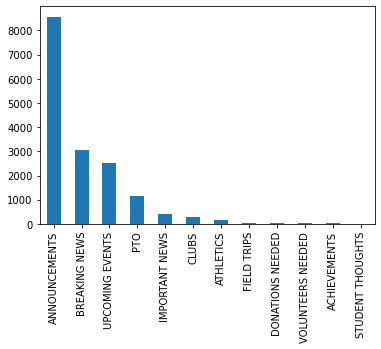

In [21]:
# the contribution of each category after data cleaning
final_df['y'].value_counts().plot(kind='bar')
plt.show()

# Data Transformations

Spliting data into test and train

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = final_df['X']
# transformed target categorical column into numerical column using LableEncoder 
le = LabelEncoder()
y = le.fit_transform(final_df['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Used Vectorizer to transform Text data to Numerical data

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
# transformed training data into vectorized data
X_train_cv = cv.fit_transform(X_train).toarray()

# Model Fitting

In [24]:
from sklearn.linear_model import LogisticRegression


lm = LogisticRegression()
lm.fit(X_train_cv,y_train)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
X_test_cv = cv.transform(X_test).toarray()
lm.score(X_test_cv,y_test)

0.7012907191149355

In [26]:
from sklearn.metrics import classification_report
print('Scores on Training Data\n')
lm_predictions_train = lm.predict(X_train_cv)
lm_training_score = classification_report(y_train, lm_predictions_train,target_names=le.classes_,zero_division=0)
print(lm_training_score)

Scores on Training Data

                   precision    recall  f1-score   support

     ACHIEVEMENTS       1.00      0.69      0.82        13
    ANNOUNCEMENTS       0.94      0.95      0.95      6849
        ATHLETICS       0.97      0.90      0.94       121
    BREAKING NEWS       0.92      0.91      0.91      2448
            CLUBS       0.98      0.98      0.98       234
 DONATIONS NEEDED       0.91      0.97      0.94        31
      FIELD TRIPS       0.97      0.93      0.95        40
   IMPORTANT NEWS       0.88      0.83      0.86       317
              PTO       0.89      0.93      0.91       900
 STUDENT THOUGHTS       0.00      0.00      0.00         2
  UPCOMING EVENTS       0.88      0.85      0.86      2042
VOLUNTEERS NEEDED       0.89      0.94      0.91        17

         accuracy                           0.92     13014
        macro avg       0.85      0.82      0.84     13014
     weighted avg       0.92      0.92      0.92     13014



In [27]:

print('Scores on Testing Data\n')
lm_predictions_test = lm.predict(X_test_cv)
lm_testing_score = classification_report(y_test, lm_predictions_test,target_names=le.classes_,zero_division=0)
print(lm_testing_score)

Scores on Testing Data

                   precision    recall  f1-score   support

     ACHIEVEMENTS       0.00      0.00      0.00         5
    ANNOUNCEMENTS       0.77      0.82      0.79      1712
        ATHLETICS       0.70      0.59      0.64        39
    BREAKING NEWS       0.62      0.58      0.60       599
            CLUBS       0.71      0.66      0.69        53
 DONATIONS NEEDED       0.83      0.33      0.48        15
      FIELD TRIPS       0.40      0.20      0.27        10
   IMPORTANT NEWS       0.42      0.35      0.38        92
              PTO       0.74      0.67      0.70       239
 STUDENT THOUGHTS       0.00      0.00      0.00         1
  UPCOMING EVENTS       0.57      0.55      0.56       483
VOLUNTEERS NEEDED       1.00      0.17      0.29         6

         accuracy                           0.70      3254
        macro avg       0.56      0.41      0.45      3254
     weighted avg       0.70      0.70      0.70      3254



In [28]:
# from sklearn.model_selection import GridSearchCV
# params = {'C': [0.01, 0.1]}
# gcv = GridSearchCV(estimator=lm,
#                        param_grid=params, 
#                        cv=5, 
#                       )
# gcv = gcv.fit(X_train_cv, y_train)
# print('Best model:\n')
# print(gcv.best_estimator_)

# print(f'\nValidation score: {gcv.best_score_:.2%}\n')

# preds = gcv.predict(X_test_cv)
# print('\nResults:\n')

In [29]:
# from sklearn.ensemble import RandomForestClassifier

# rm = RandomForestClassifier()
# rm.fit(X_train_cv,y_train)

In [30]:
# rm.score(X_test_cv, y_test)

# Conclusion
- As the data is imbalanced accuracy is not a good metric to consider, F1 score will be better metric to draw the conclusion
- The model did not perform well in predicting few of the categores as they very few in number, Achivements and student thoughts were not predicted well
- The model has the symptoms of overfitting as the training score is greater than testing score
- GridSearchCv was taking longer time to run the cell,thats the reason why I commented out the cell
- Similar case with random forest it is taking longer time to run the cell but giving the worst results than logestic regression 
- By giving the model access to a larger and more varied dataset, greater data collection can help to solve this problem of overfitting
